In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import torch
import torchvision.models as models
!pip install timm==0.6.13
import timm
from fastai.data.external import *
from fastai.vision.all import *
import PIL
from huggingface_hub import from_pretrained_fastai, _save_pretrained_fastai

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
tom = ['Bacterial_spot',
 'Leaf_Mold',
 'healthy',
 'Tomato_mosaic_virus',
 'Tomato_YellowLeaf__Curl_Virus',
 'Early_blight',
 'Spider_mites_Two_spotted_spider_mite',
 'Septoria_leaf_spot',
 'Late_blight',
 'Target_Spot']

In [ ]:
learn_vit = from_pretrained_fastai("Luna-Skywalker/tomato_dtect_v2")
# _save_pretrained_fastai(potato, "./ml_models/tomato_dtect")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/768 [00:00<?, ?B/s]

pyproject.toml:   0%|          | 0.00/163 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

model.pkl:   0%|          | 0.00/145M [00:00<?, ?B/s]

In [ ]:
def classify_image(categories,model,img):
  pred_class, pred_idx, probs = model.predict(img)
  return dict(zip(categories,map(float,probs)))

In [ ]:
im1 = Image.open('/content/Bacterial_spot_sample.JPG')
width = 224
height = 224
im2 = im1.resize((width, height), Image.NEAREST)

(224, 224)


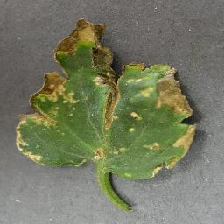

In [ ]:
print(im2.size)
im2.to_thumb(224)

In [ ]:
classify_image(tom,learn_vit,'/content/Bacterial_spot_sample.JPG')

{'Bacterial_spot': 0.999521017074585,
 'Leaf_Mold': 0.00020187564950902015,
 'healthy': 4.5839369704481214e-05,
 'Tomato_mosaic_virus': 4.689910383604001e-06,
 'Tomato_YellowLeaf__Curl_Virus': 0.00019967486150562763,
 'Early_blight': 1.9817755969597783e-07,
 'Spider_mites_Two_spotted_spider_mite': 8.025399438338354e-06,
 'Septoria_leaf_spot': 1.6273310393444262e-05,
 'Late_blight': 3.3784391462177155e-07,
 'Target_Spot': 2.0935467546223663e-06}